Mean Squared Error on Training Data: 3.97
Mean Squared Error on Drifted Data: 4.16


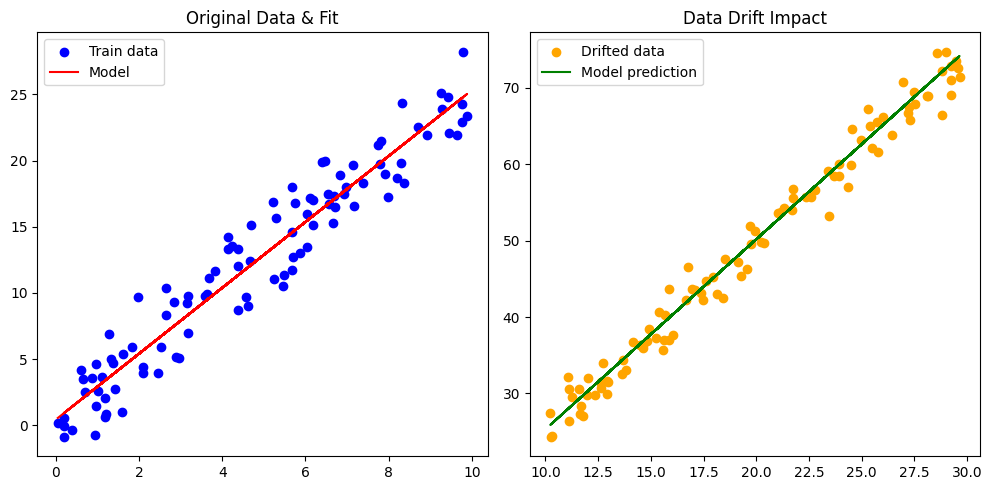

In [1]:
# Data Drift Impact on Model
# Question: Use a simple linear regression model to demonstrate how data drift affects model predictions.

# 1. Train a model on the original data:
# 2. Evaluate on the drifted data:
# 3. Compare errors:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Generate original (training) data
np.random.seed(0)
X_train = np.random.rand(100, 1) * 10  # Features between 0 and 10
y_train = 2.5 * X_train + np.random.randn(100, 1) * 2  # Linear with noise

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 2. Generate drifted (testing) data
X_drift = np.random.rand(100, 1) * 20 + 10  # Shifted to range 10–30 (data drift)
y_drift = 2.5 * X_drift + np.random.randn(100, 1) * 2

# Predict using original model
y_pred_drift = model.predict(X_drift)

# 3. Compare errors
mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_drift = mean_squared_error(y_drift, y_pred_drift)

print(f"Mean Squared Error on Training Data: {mse_train:.2f}")
print(f"Mean Squared Error on Drifted Data: {mse_drift:.2f}")

# Plot for visualization
plt.figure(figsize=(10,5))

# Original data
plt.subplot(1,2,1)
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.plot(X_train, model.predict(X_train), color='red', label='Model')
plt.title('Original Data & Fit')
plt.legend()

# Drifted data
plt.subplot(1,2,2)
plt.scatter(X_drift, y_drift, color='orange', label='Drifted data')
plt.plot(X_drift, y_pred_drift, color='green', label='Model prediction')
plt.title('Data Drift Impact')
plt.legend()

plt.tight_layout()
plt.show()



In [2]:
# Monitoring Data Distribution Changes
# Question: Use Python to monitor distribution changes in features to detect potential data drift.

# 1. Calculate feature statistics (mean and standard deviation) for both original and drifted data:
# 2. Compare statistics:
# 3. Set thresholds to detect significant drift:

import numpy as np
import pandas as pd

# 1. Simulate original and drifted feature data
np.random.seed(42)
original_data = np.random.normal(loc=50, scale=5, size=1000)   # mean=50, std=5
drifted_data = np.random.normal(loc=60, scale=8, size=1000)    # mean shifted to 60, std increased

# 2. Calculate statistics
original_mean = np.mean(original_data)
original_std = np.std(original_data)

drifted_mean = np.mean(drifted_data)
drifted_std = np.std(drifted_data)

print(f"Original Mean: {original_mean:.2f}, Std: {original_std:.2f}")
print(f"Drifted Mean:  {drifted_mean:.2f}, Std: {drifted_std:.2f}")

# 3. Compare against threshold
mean_diff = abs(drifted_mean - original_mean)
std_diff = abs(drifted_std - original_std)

mean_threshold = 5   # Example threshold
std_threshold = 3

print("\nDrift Detection:")
if mean_diff > mean_threshold:
    print(f"Significant mean drift detected (Δ = {mean_diff:.2f})")
else:
    print("Mean is stable.")

if std_diff > std_threshold:
    print(f"Significant standard deviation drift detected (Δ = {std_diff:.2f})")
else:
    print("Standard deviation is stable.")



Original Mean: 50.10, Std: 4.89
Drifted Mean:  60.57, Std: 7.98

Drift Detection:
Significant mean drift detected (Δ = 10.47)
Significant standard deviation drift detected (Δ = 3.08)


In [4]:
# Automating Data Quality Checks with Python
# Question: Automate a basic data validation process using Python to ensure the dataset's
# structural integrity.

# 1. Define validation checks:
# 2. Apply validation:
import pandas as pd

# Sample DataFrame (you can replace with your actual dataset)
data = pd.DataFrame({
    'id': [1, 2, 2, 4],
    'name': ['Alice', 'Bob', 'Bob', None],
    'age': [25, 30, 30, 22]
})

# 1. Define validation checks
expected_columns = ['id', 'name', 'age']
expected_dtypes = {'id': 'int64', 'name': 'object', 'age': 'int64'}

def validate_structure(df):
    report = {}

    # Check column presence
    report['missing_columns'] = [col for col in expected_columns if col not in df.columns]

    # Check for missing values
    report['missing_values'] = df.isnull().sum().to_dict()

    # Check for duplicate rows
    report['duplicate_rows'] = df.duplicated().sum()

    # Check data types
    report['dtype_mismatches'] = {
        col: str(df[col].dtype) for col in expected_dtypes
        if col in df.columns and str(df[col].dtype) != expected_dtypes[col]
    }

    return report

# 2. Apply validation
validation_report = validate_structure(data)

# Display validation results
for check, result in validation_report.items():
    print(f"{check}: {result}")




missing_columns: []
missing_values: {'id': 0, 'name': 1, 'age': 0}
duplicate_rows: 1
dtype_mismatches: {}


In [ ]:
# Introducing Great Expectations for Data Validation
# Question: Use Great Expectations to set up data validation checks for a dataset.

# 1. Install Great Expectations:
# 2. Create a new expectations suite:
# 3. Load data and generate expectations:

import great_expectations as ge
import pandas as pd

# Load your data (replace with your actual dataset)
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie'],
    'age': [25, 30, 22],
    'email': ['alice@example.com', 'bob@example.com', 'charlie@example.com']
})

# Convert to Great Expectations dataframe
ge_df = ge.from_pandas(df)

# Create expectations
ge_df.expect_column_to_exist('name')
ge_df.expect_column_values_to_not_be_null('age')
ge_df.expect_column_values_to_be_between('age', min_value=18, max_value=60)
ge_df.expect_column_values_to_match_regex('email', r'^\S+@\S+\.\S+$')

# View validation results
results = ge_df.validate()
print(results)



In [ ]:
# Automating Constraint Checks with Python
# Question: Automate primary key and foreign key constraint checks using Python to ensure dataset compliance.


# 1. Assuming datasets exist with primary and foreign key relationships in pandas dataframes employees_df and departments_df :

import pandas as pd

departments_df = pd.DataFrame({
    'dept_id': [1, 2, 3],
    'dept_name': ['HR', 'Engineering', 'Sales']
})

employees_df = pd.DataFrame({
    'emp_id': [101, 102, 103, 104],
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'dept_id': [1, 2, 4, 2]
})

def check_primary_key(df, key_column):
    return df[key_column].is_unique and df[key_column].notnull().all()

def check_foreign_key(child_df, child_column, parent_df, parent_column):
    return child_df[~child_df[child_column].isin(parent_df[parent_column])]

print("Primary key valid:", check_primary_key(departments_df, 'dept_id'))
print("Foreign key violations:\n", check_foreign_key(employees_df, 'dept_id', departments_df, 'dept_id'))



In [ ]:
# Advanced Data Drift Detection using Statistical Tests
# Question: Implement Kolmogorov-Smirnov test using Python to detect data drift at a more sophisticated level.

# 1. Use SciPy to perform KS test:
from scipy.stats import ks_2samp
import numpy as np

original_data = np.random.normal(loc=0, scale=1, size=1000)
drifted_data = np.random.normal(loc=0.5, scale=1.2, size=1000)

statistic, p_value = ks_2samp(original_data, drifted_data)

print("KS Statistic:", statistic)
print("P-Value:", p_value)
print("Drift Detected:" if p_value < 0.05 else "No Significant Drift")


